In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/usr0/home/naveenr/projects/spurious_concepts/ConceptBottleneck/')
sys.path.append('/usr0/home/naveenr/projects/spurious_concepts')

In [3]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
import torch.nn as nn
import torch.optim as optim
import pickle
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import Image
from captum.attr import visualization as viz
from matplotlib.colors import LinearSegmentedColormap
import cv2
from copy import copy 
import itertools
import json
import matplotlib.image as mpimg
from collections import Counter
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from itertools import chain


/usr0/home/naveenr/miniconda3/envs/concepts/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from src.images import *
from src.util import *
from src.models import *
from src.plot import *

# Plots for NeurIPs Workshop

## Synthetic Dataset

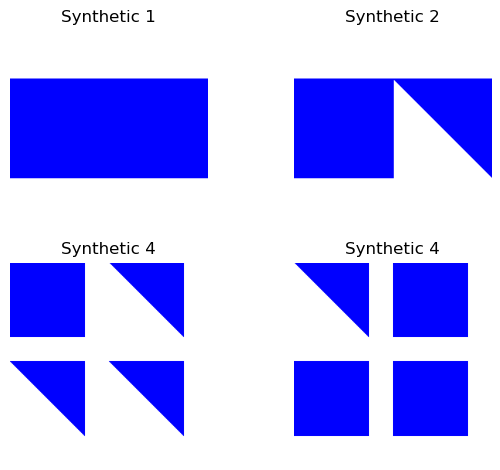

In [10]:
num_objects_list = [1, 2, 4, 4]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)

# Loop through the images and display them in the subplots
for i, num_objects in enumerate(num_objects_list):
    img_num = i+1 

    file_loc = "../../results/synthetic/objects={}_noisy=False_wd=0.0004_model=small3_optimizer=sgd_seed=42/{}.png".format(num_objects,img_num)
    img = Image.open(file_loc)
    
    # Determine the subplot position
    row = i // 2
    col = i % 2
    
    # Display the image in the appropriate subplot
    axs[row, col].imshow(img)
    axs[row, col].set_title('Synthetic {}'.format(num_objects))
    axs[row, col].axis('off')

# Remove the empty subplot
if len(num_objects_list) < 4:
    fig.delaxes(axs[1, 1])

# Adjust layout
plt.tight_layout()

plt.savefig("../../results/figures/example_dataset.pdf",dpi=300, bbox_inches='tight')

# Show the grid of images
plt.show()

{'num_attributes': 2, 'seed': 42, 'encoder_model': 'small3', 'epochs': 50, 'debugging': False}
{'num_attributes': 2, 'seed': 43, 'encoder_model': 'small3', 'epochs': 50, 'debugging': False}
{'num_attributes': 2, 'seed': 44, 'encoder_model': 'small3', 'epochs': 50, 'debugging': False}
{'num_attributes': 2, 'seed': 42, 'encoder_model': 'small4', 'epochs': 50, 'debugging': False}
{'num_attributes': 2, 'seed': 43, 'encoder_model': 'small4', 'epochs': 50, 'debugging': False}
{'num_attributes': 2, 'seed': 44, 'encoder_model': 'small4', 'epochs': 50, 'debugging': False}
{'num_attributes': 2, 'seed': 42, 'encoder_model': 'small5', 'epochs': 50, 'debugging': False}
{'num_attributes': 2, 'seed': 43, 'encoder_model': 'small5', 'epochs': 50, 'debugging': False}
{'num_attributes': 2, 'seed': 44, 'encoder_model': 'small5', 'epochs': 50, 'debugging': False}
{'num_attributes': 2, 'seed': 42, 'encoder_model': 'small6', 'epochs': 50, 'debugging': False}
{'num_attributes': 2, 'seed': 43, 'encoder_model':

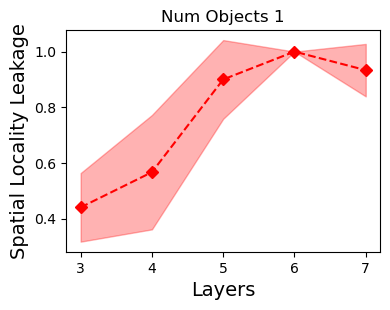

{'num_attributes': 4, 'seed': 42, 'encoder_model': 'small3', 'epochs': 50, 'debugging': False}
{'num_attributes': 4, 'seed': 43, 'encoder_model': 'small3', 'epochs': 50, 'debugging': False}
{'num_attributes': 4, 'seed': 44, 'encoder_model': 'small3', 'epochs': 50, 'debugging': False}
{'num_attributes': 4, 'seed': 42, 'encoder_model': 'small4', 'epochs': 50, 'debugging': False}
{'num_attributes': 4, 'seed': 43, 'encoder_model': 'small4', 'epochs': 50, 'debugging': False}
{'num_attributes': 4, 'seed': 44, 'encoder_model': 'small4', 'epochs': 50, 'debugging': False}
{'num_attributes': 4, 'seed': 42, 'encoder_model': 'small5', 'epochs': 50, 'debugging': False}
{'num_attributes': 4, 'seed': 43, 'encoder_model': 'small5', 'epochs': 50, 'debugging': False}
{'num_attributes': 4, 'seed': 44, 'encoder_model': 'small5', 'epochs': 50, 'debugging': False}
{'num_attributes': 4, 'seed': 42, 'encoder_model': 'small6', 'epochs': 50, 'debugging': False}
{'num_attributes': 4, 'seed': 43, 'encoder_model':

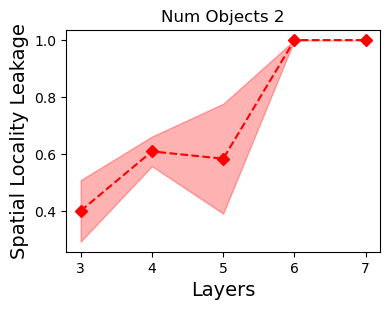

{'num_attributes': 8, 'seed': 42, 'encoder_model': 'small3', 'epochs': 50, 'debugging': False}
{'num_attributes': 8, 'seed': 43, 'encoder_model': 'small3', 'epochs': 50, 'debugging': False}
{'num_attributes': 8, 'seed': 44, 'encoder_model': 'small3', 'epochs': 50, 'debugging': False}
{'num_attributes': 8, 'seed': 42, 'encoder_model': 'small4', 'epochs': 50, 'debugging': False}
{'num_attributes': 8, 'seed': 43, 'encoder_model': 'small4', 'epochs': 50, 'debugging': False}
{'num_attributes': 8, 'seed': 44, 'encoder_model': 'small4', 'epochs': 50, 'debugging': False}
{'num_attributes': 8, 'seed': 42, 'encoder_model': 'small5', 'epochs': 50, 'debugging': False}
{'num_attributes': 8, 'seed': 43, 'encoder_model': 'small5', 'epochs': 50, 'debugging': False}
{'num_attributes': 8, 'seed': 44, 'encoder_model': 'small5', 'epochs': 50, 'debugging': False}
{'num_attributes': 8, 'seed': 42, 'encoder_model': 'small6', 'epochs': 50, 'debugging': False}
{'num_attributes': 8, 'seed': 43, 'encoder_model':

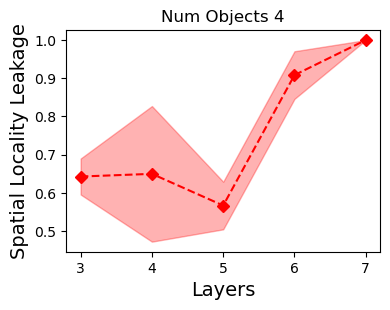

{'num_attributes': 16, 'seed': 42, 'encoder_model': 'small3', 'epochs': 50, 'debugging': False}
{'num_attributes': 16, 'seed': 43, 'encoder_model': 'small3', 'epochs': 50, 'debugging': False}
{'num_attributes': 16, 'seed': 44, 'encoder_model': 'small3', 'epochs': 50, 'debugging': False}
{'num_attributes': 16, 'seed': 42, 'encoder_model': 'small4', 'epochs': 50, 'debugging': False}
{'num_attributes': 16, 'seed': 43, 'encoder_model': 'small4', 'epochs': 50, 'debugging': False}
{'num_attributes': 16, 'seed': 44, 'encoder_model': 'small4', 'epochs': 50, 'debugging': False}
{'num_attributes': 16, 'seed': 42, 'encoder_model': 'small5', 'epochs': 50, 'debugging': False}
{'num_attributes': 16, 'seed': 43, 'encoder_model': 'small5', 'epochs': 50, 'debugging': False}
{'num_attributes': 16, 'seed': 44, 'encoder_model': 'small5', 'epochs': 50, 'debugging': False}
{'num_attributes': 16, 'seed': 42, 'encoder_model': 'small6', 'epochs': 50, 'debugging': False}
{'num_attributes': 16, 'seed': 43, 'enco

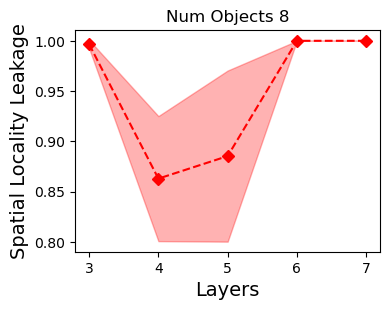

In [33]:

for num_objects in [1,2,4,8]:
    activations_by_size = [] 
    for num_layers in range(3,8):
        activations_by_size.append([])
        for seed in [42,43,44]:
            result_name = get_name_matching_parameters({'num_attributes': 2*num_objects,'seed': seed, 'encoder_model': 'small{}'.format(num_layers), 'epochs': 50, 'debugging': False})
            result_name = result_name[0]
            results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
            results = json.load(open(results_loc,"r"))
            activations_by_size[-1].append(np.mean(results['adversarial_activations']))

    activations_by_size = np.array(activations_by_size)
    mean_vals = np.mean(activations_by_size,axis=1)
    std_vals = np.std(activations_by_size,axis=1)

    x_vals = list(range(3,8))

    plt.figure(figsize=(4,3))

    plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3,  color='red')
    plt.plot(x_vals, mean_vals, 'rD--')


    # Add labels, legend, and title
    plt.xlabel('Layers',fontsize=14)
    plt.ylabel('Spatial Locality Leakage',fontsize=14)

    plt.tight_layout()

    plt.title("Num Objects {}".format(num_objects))
    plt.savefig("../../results/figures/cnn_activation_{}.pdf".format(num_objects),dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

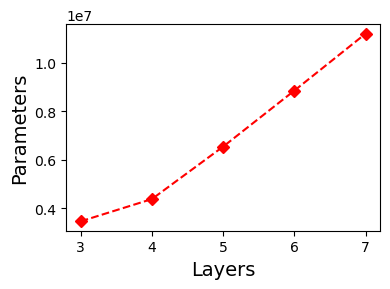

In [23]:
parameters_by_size = [] 

for num_layers in range(3,8):
    joint_model = get_synthetic_model("synthetic_object/synthetic_1",{'encoder_model': "small{}".format(num_layers), 'seed': 42, 'epochs': 50, 'num_attributes': 2})
    parameters_by_size.append(sum(p.numel() for p in joint_model.parameters()))

x_vals = list(range(3,8))

plt.figure(figsize=(4,3))

plt.plot(x_vals, parameters_by_size, 'rD--')


# Add labels, legend, and title
plt.xlabel('Layers',fontsize=14)
plt.ylabel('Parameters',fontsize=14)

plt.tight_layout()

plt.savefig("../../results/figures/cnn_parameters.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

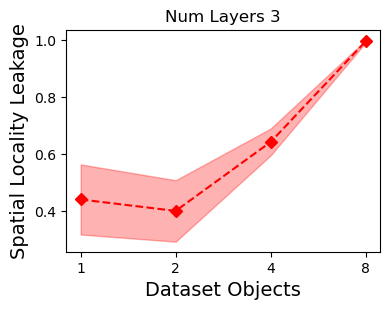

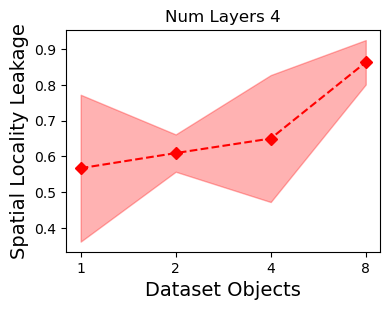

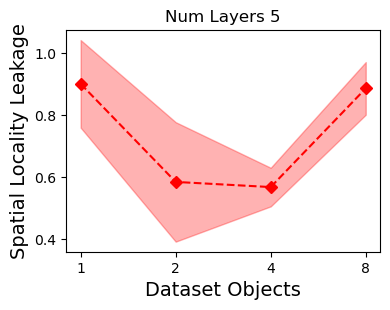

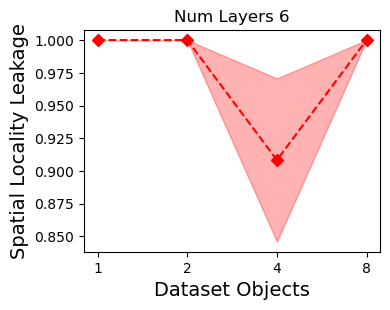

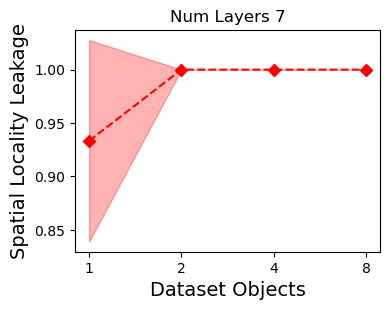

In [34]:
for num_layers in range(3,8):

    activations_by_size = [] 
    for num_objects in [1,2,4,8]:
        activations_by_size.append([])
        for seed in [42,43,44]:
            result_name = get_name_matching_parameters({'num_attributes': 2*num_objects,'seed': seed, 'encoder_model': 'small{}'.format(num_layers), 'epochs': 50, 'debugging': False})
            result_name = result_name[0]
            results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
            results = json.load(open(results_loc,"r"))
            activations_by_size[-1].append(np.mean(results['adversarial_activations']))

    activations_by_size = np.array(activations_by_size)
    mean_vals = np.mean(activations_by_size,axis=1)
    std_vals = np.std(activations_by_size,axis=1)

    x_vals = list(range(0,4))

    plt.figure(figsize=(4,3))

    plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3,  color='red')
    plt.plot(x_vals, mean_vals, 'rD--')


    # Add labels, legend, and title
    plt.xlabel('Dataset Objects',fontsize=14)
    plt.ylabel('Spatial Locality Leakage',fontsize=14)
    plt.xticks(x_vals,[1,2,4,8])

    plt.tight_layout()

    plt.title("Num Layers {}".format(num_layers))
    plt.savefig("../../results/figures/cnn_activation_nobjects_{}.pdf".format(num_layers),dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

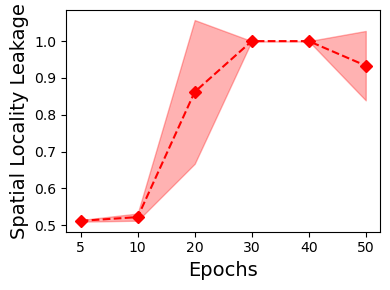

In [36]:
activations_by_size = [] 
for epochs in [5,10,20,30,40,50]:
    activations_by_size.append([])
    for seed in [42,43,44]:
        result_name = get_name_matching_parameters({'num_attributes': 2,'seed': seed, 'encoder_model': 'small7', 'epochs': epochs, 'debugging': False})
        result_name = result_name[0]
        results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
        results = json.load(open(results_loc,"r"))
        activations_by_size[-1].append(np.mean(results['adversarial_activations']))

activations_by_size = np.array(activations_by_size)
mean_vals = np.mean(activations_by_size,axis=1)
std_vals = np.std(activations_by_size,axis=1)

x_vals = list(range(0,6))

plt.figure(figsize=(4,3))

plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3,  color='red')
plt.plot(x_vals, mean_vals, 'rD--')


# Add labels, legend, and title
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Spatial Locality Leakage',fontsize=14)
plt.xticks(x_vals,[5,10,20,30,40,50])

plt.tight_layout()

plt.savefig("../../results/figures/cnn_activation_epochs.pdf".format(num_layers),dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

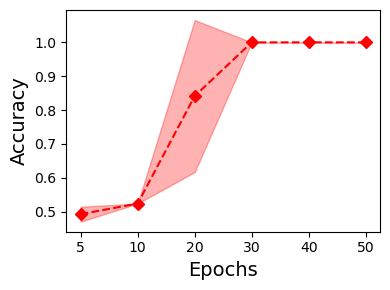

In [39]:
activations_by_size = [] 
for epochs in [5,10,20,30,40,50]:
    activations_by_size.append([])
    for seed in [42,43,44]:
        result_name = get_name_matching_parameters({'num_attributes': 2,'seed': seed, 'encoder_model': 'small7', 'epochs': epochs, 'debugging': False})
        result_name = result_name[0]
        results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
        results = json.load(open(results_loc,"r"))
        activations_by_size[-1].append(results['test_accuracy'])

activations_by_size = np.array(activations_by_size)
mean_vals = np.mean(activations_by_size,axis=1)
std_vals = np.std(activations_by_size,axis=1)

x_vals = list(range(0,6))

plt.figure(figsize=(4,3))

plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3,  color='red')
plt.plot(x_vals, mean_vals, 'rD--')


# Add labels, legend, and title
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.xticks(x_vals,[5,10,20,30,40,50])

plt.tight_layout()

plt.savefig("../../results/figures/cnn_accuracy_epochs.pdf".format(num_layers),dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [42]:
results_matrix = [[["" for k in range(2)] for i in range(3)] for j in range(3)]

for i,num_layers in enumerate([1,2,3]):
    for j,model_size in enumerate([5,10,15]):
        activation_list = []

        for seed in [42,43,44]:
            result_name = get_name_matching_parameters({'num_attributes': 2,'seed': seed, 'encoder_model': 'mlp', 'num_middle_encoder': num_layers, 'expand_dim_encoder': model_size })
            result_name = result_name[0]
            results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
            results = json.load(open(results_loc,"r"))
            activation_list.append(min(results['adversarial_activations']))

        results_matrix[i][j][0] = str("{:.2f}".format(np.mean(activation_list)))
        results_matrix[i][j][1] = str("{:.2f}".format(np.std(activation_list)))

latex_table = """\\begin{{table}}[]
\\begin{{tabular}}{{@{{}}lll@{{}}}}
\centering 
\\toprule
Depth & Width & Activation \\\\ \\midrule
1     & 5     & {} $\\pm$ {}       \\\\
      & 10    & {} $\\pm$ {}        \\\\
      & 15    & {} $\\pm$ {}        \\\\ 
2     & 5     & {} $\\pm$ {}        \\\\
      & 10    & {} $\\pm$ {}        \\\\
      & 15    & {} $\\pm$ {}        \\\\
3     & 5     & {} $\\pm$ {}        \\\\
      & 10    & {} $\\pm$ {}        \\\\
      & 15    & {} $\\pm$ {}        \\\\ \\bottomrule 
\\end{{tabular}}
\\caption{{Activation results by MLP model Depth and Width. We see that, with increasing width, MLP models have increasingly large activations. However, contrary to intuitions, increasing width has no clear pattern.}}
\\end{{table}}""".format(*chain.from_iterable(list(chain.from_iterable(results_matrix))))

print(latex_table)

\begin{table}[]
\begin{tabular}{@{}lll@{}}
\centering 
\toprule
Depth & Width & Activation \\ \midrule
1     & 5     & 0.63 $\pm$ 0.32       \\
      & 10    & 0.80 $\pm$ 0.28        \\
      & 15    & 0.97 $\pm$ 0.05        \\ 
2     & 5     & 0.59 $\pm$ 0.30        \\
      & 10    & 0.47 $\pm$ 0.08        \\
      & 15    & 0.57 $\pm$ 0.32        \\
3     & 5     & 0.49 $\pm$ 0.40        \\
      & 10    & 0.74 $\pm$ 0.19        \\
      & 15    & 0.74 $\pm$ 0.09        \\ \bottomrule 
\end{tabular}
\caption{Activation results by MLP model Depth and Width. We see that, with increasing width, MLP models have increasingly large activations. However, contrary to intuitions, increasing width has no clear pattern.}
\end{table}


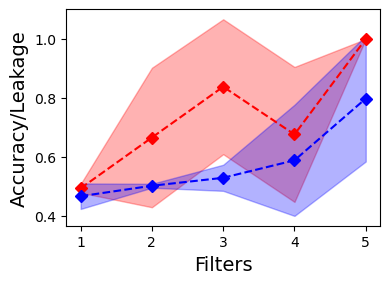

In [11]:
seeds = [42,43,44]
file_names = ["../../results/synthetic/mlp_analysis/results_{}.json".format(seed) for seed in seeds]
data = [json.load(open(i)) for i in file_names]

accuracy_values = np.array([i['accuracy'] for i in data])
leakage_values = np.array([i['spatial_locality_leakage'] for i in data])

mean_accuracy = np.mean(accuracy_values,axis=0)
std_accuracy = np.std(accuracy_values,axis=0)

mean_leakage = np.mean(leakage_values,axis=0)
std_leakage = np.std(leakage_values,axis=0)

x_vals = [1,2,3,4,5]

plt.figure(figsize=(4,3))

plt.fill_between(x_vals, mean_accuracy - std_accuracy, mean_accuracy + std_accuracy, alpha=0.3,  color='red')
plt.plot(x_vals, mean_accuracy, 'rD--')

plt.fill_between(x_vals, mean_leakage - std_leakage, mean_leakage + std_leakage, alpha=0.3,  color='blue')
plt.plot(x_vals, mean_leakage, 'bD--')

# Add labels, legend, and title
plt.xlabel('Filters',fontsize=14)
plt.ylabel('Accuracy/Leakage',fontsize=14)

plt.tight_layout()

plt.savefig("../../results/figures/mlp_filters.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [7]:
data[0]

{'spatial_locality_leakage': [0.4925671696662903,
  0.49752238988876346,
  0.5024776101112365,
  0.8485409408807755,
  1.0],
 'accuracy': [0.484375, 0.484375, 1.0, 0.515625, 1.0],
 'sigma_depth': {'1': [0.1288170834657416,
   0.4146388323427038,
   0.27195229061796466,
   0.41171007451269714,
   0.37677857079083865],
  '2': [0.07760196413262883,
   0.4146388323427038,
   0.39027823382823246,
   0.41171007451269714,
   0.303740164906906],
  '3': [0.2784672347336033,
   0.4146388323427038,
   0.25749058780878986,
   0.41171007451269714,
   0.12787172352741702]},
 'sigma_width': {'5': [0.1288170834657416,
   0.4146388323427038,
   0.27195229061796466,
   0.41171007451269714,
   0.37677857079083865],
  '10': [0.10090972272233105,
   0.4146388323427038,
   0.28752807374706263,
   0.41171007451269714,
   0.16746964815303556,
   0.3628719419096021,
   0.4126448079610978,
   0.41482683947212684,
   0.11558656224435213,
   0.2797247616212519],
  '15': [0.3543200697877583,
   0.4146388323427038,

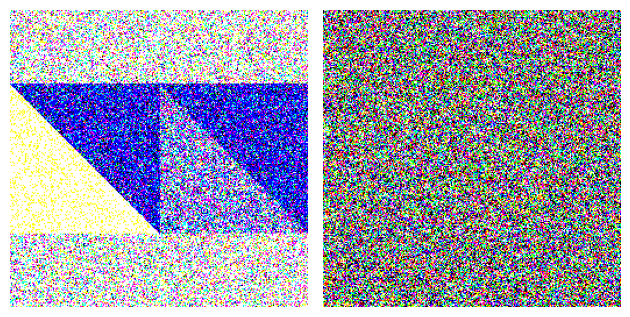

In [ ]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(1, 2)

# Loop through the images and display them in the subplots
for i in range(2):
    file_loc = "results/synthetic/mlp_filter_{}.png".format(i)
    img = Image.open(file_loc)
    
    # Determine the subplot position
    col = i
    
    # Display the image in the appropriate subplot
    axs[col].imshow(img)
    axs[col].axis('off')

# Adjust layout
plt.tight_layout()

plt.savefig("results/figures/mlp_filters.pdf",dpi=300, bbox_inches='tight')

# Show the grid of images
plt.show()

In [26]:
ablation_results = json.load(open("results/ablation/mlp_filter_ablation.json"))
ablation_results_adversarialness = np.array(ablation_results['15']['adversarialness'])
ablation_results_accuracies = np.array(ablation_results['15']['accuracies'])

num_filters_unchanged = 0
num_filters_no_adversarialness = 0
num_filters_worse_accuracy = 0

for i in range(ablation_results_adversarialness.shape[1]):
    adversarial_mean = ablation_results_adversarialness[0][i][1]
    adversarial_std = ablation_results_adversarialness[1][i][1]

    accuracy_mean = ablation_results_accuracies[0][i]
    accuracy_std = ablation_results_accuracies[1][i]

    if adversarial_mean < 1 and accuracy_mean == 1.0:
        print("Standard deviation for filter {} is {}".format(i,adversarial_std))
        num_filters_no_adversarialness += 1
    elif accuracy_mean < 1:
        num_filters_worse_accuracy += 1
    else:
        num_filters_unchanged += 1
num_filters_unchanged, num_filters_no_adversarialness, num_filters_worse_accuracy

Standard deviation for filter 2 is 0.26881179213523865
Standard deviation for filter 3 is 0.26881179213523865
Standard deviation for filter 12 is 0.4626939594745636
Standard deviation for filter 13 is 0.0055541954934597015


(9, 4, 2)

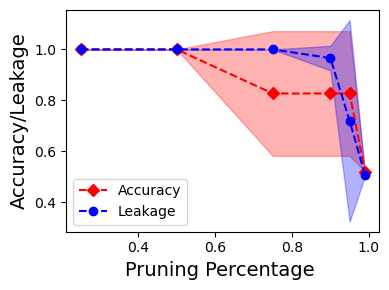

In [7]:
ablation_results = [json.load(open("results/ablation/pruning_{}.json".format(i))) for i in [42,43,44]]

accuracy_by_pruning_layer = []
activations_by_pruning_layer = []

accuracy_by_pruning_weight = []
activations_by_pruning_weight = []

x_axis = sorted([float(i) for i in ablation_results[0]['weight']])

for pruning_amount in ablation_results[0]['layer']:
    accuracy_by_pruning_layer.append([min(i['layer'][pruning_amount]['accuracies']) for i in ablation_results])
    activations_by_pruning_layer.append([min(i['layer'][pruning_amount]['activations']) for i in ablation_results])

for pruning_amount in ablation_results[0]['weight']:
    accuracy_by_pruning_weight.append([min(i['weight'][pruning_amount]['accuracies']) for i in ablation_results])
    activations_by_pruning_weight.append([min(i['weight'][pruning_amount]['activations']) for i in ablation_results])

plt.figure(figsize=(4,3))

y_accuracy = np.array([np.mean(i) for i in accuracy_by_pruning_layer])
y_activations = np.array([np.mean(i) for i in activations_by_pruning_layer])

std_accuracy = np.array([np.std(i) for i in accuracy_by_pruning_layer])
std_activations = np.array([np.std(i) for i in activations_by_pruning_layer])

plt.fill_between(x_axis, y_accuracy - std_accuracy, y_accuracy + std_accuracy, alpha=0.3,  color='red')
plt.plot(x_axis, y_accuracy, 'rD--', label='Accuracy')

# Plot Layer Activations - Red with Circles
plt.fill_between(x_axis, y_activations - std_activations, y_activations + std_activations, alpha=0.3, color='blue')
plt.plot(x_axis, y_activations, 'bo--', label='Leakage')


# Add labels, legend, and title
plt.xlabel('Pruning Percentage ',fontsize=14)
plt.ylabel('Accuracy/Leakage',fontsize=14)
plt.legend()

plt.tight_layout()

plt.savefig("results/figures/layer_pruning.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



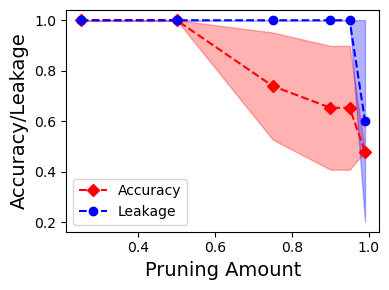

In [8]:
plt.figure(figsize=(4,3))

y_accuracy = np.array([np.mean(i) for i in accuracy_by_pruning_weight])
y_activations = np.array([np.mean(i) for i in activations_by_pruning_weight])

std_accuracy = np.array([np.std(i) for i in accuracy_by_pruning_weight])
std_activations = np.array([np.std(i) for i in activations_by_pruning_weight])

plt.fill_between(x_axis, y_accuracy - std_accuracy, y_accuracy + std_accuracy, alpha=0.3,  color='red')
plt.plot(x_axis, y_accuracy, 'rD--', label='Accuracy')

# Plot Layer Activations - Red with Circles
plt.fill_between(x_axis, y_activations - std_activations, y_activations + std_activations, alpha=0.3, color='blue')
plt.plot(x_axis, y_activations, 'bo--', label='Leakage')

# Add labels, legend, and title
plt.xlabel('Pruning Amount',fontsize=14)
plt.ylabel('Accuracy/Leakage',fontsize=14)
plt.legend()

plt.tight_layout()

plt.savefig("results/figures/weight_pruning.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



## DSprites 

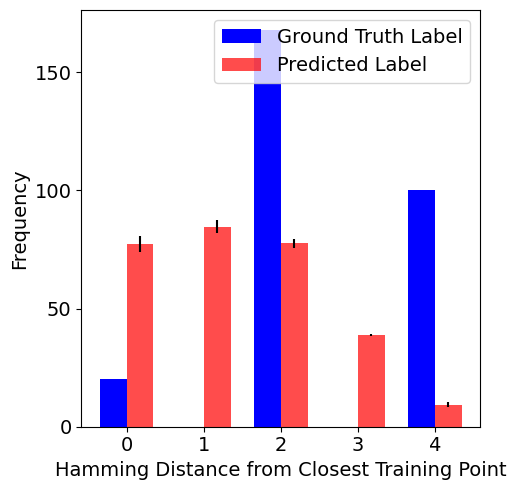

In [11]:
sns.reset_orig()
all_our_distance = []
all_ground_truth = []

concept_names = [
    "is_white",
    "is_square",
    "is_ellipse",
    "is_heart",
    "is_scale_0.5",
    "is_scale_0.6",
    "is_scale_0.7",
    "is_scale_0.8",
    "is_scale_0.9",
    "is_scale_1",
    "is_orientation_0",
    "is_orientation_90",
    "is_orientation_180",
    "is_orientation_270",
    "is_x_0",
    "is_x_16",
    "is_y_0",
    "is_y_16",
] 

for seed in [42,43,44]:
    predictions = json.load(open('results/dsprites/dsprites_20_predictions_{}.json'.format(seed),'r'))
    all_predictions = predictions['our_predictions']
    present_concept_combo = predictions['train_concepts']
    correct_answers = predictions['ground_truths']
    extra_predictions = predictions['predictions_raw']

    our_distance_freq = []
    ground_truth_distance_freq = []


    for i,pred in enumerate(all_predictions):
        distances = [hamming_distance(all_predictions[i],j) for j in present_concept_combo]
        min_distance = np.min(distances)
        our_distance_freq.append(min_distance)

    for i,pred in enumerate(correct_answers):
        distances = [hamming_distance(correct_answers[i],j) for j in present_concept_combo]
        min_distance = np.min(distances)
        ground_truth_distance_freq.append(min_distance)
    ground_truth_distance_freq = Counter(ground_truth_distance_freq)
    our_distance_freq = Counter(our_distance_freq)

    for i in our_distance_freq:
        if i not in ground_truth_distance_freq:
            ground_truth_distance_freq[i] = 0

    all_our_distance.append([our_distance_freq[i] for i in range(5)])
    all_ground_truth.append([ground_truth_distance_freq[i] for i in range(5)])

all_our_distance = np.array(all_our_distance)
all_ground_truth = np.array(all_ground_truth)

labels = [0, 1, 2, 3, 4]

# Set the width of the bars
bar_width = 0.35

# Calculate the x-coordinates for the bars
x = np.arange(len(labels))

# Create a figure and axis for the bar graph
fig, ax = plt.subplots(figsize=(5,5))

ground_truth_mean = np.mean(all_ground_truth,axis=0)
ground_truth_std = np.std(all_ground_truth,axis=0)

our_distance_mean =  np.mean(all_our_distance,axis=0)
our_distance_std = np.std(all_our_distance,axis=0)

# Create blue bars for ground_truth_distance_freq (or 0 if not present)
ax.bar(x - bar_width/2, ground_truth_mean, bar_width, yerr=ground_truth_std, color='blue', label='Ground Truth Label')

# Create yellow bars for our_distance_freq (or 0 if not present)
ax.bar(x + bar_width/2, our_distance_mean, bar_width, yerr=our_distance_std,color='red', label='Predicted Label', alpha=0.7)

# Set labels and title
ax.set_xlabel('Hamming Distance from Closest Training Point',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=14)
ax.set_yticks([0,50,100,150])
ax.set_yticklabels([0,50,100,150],fontsize=14)
ax.legend(fontsize='14')

# Show the plot
plt.tight_layout()
plt.savefig("results/figures/dsprites_distance_bar.pdf",dpi=300, bbox_inches='tight')
plt.show()

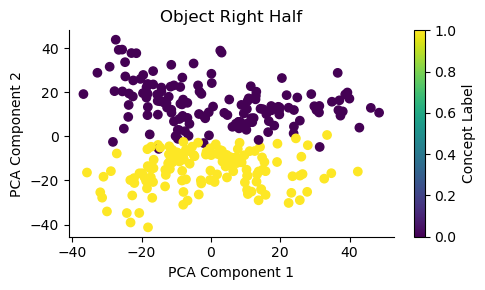

<Figure size 640x480 with 0 Axes>

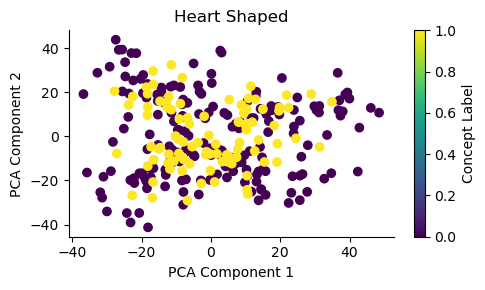

In [12]:
pca_dict = json.load(open('results/dsprites/pca_images.json','r'))
pca_images = np.array(pca_dict['pca_images'])
image_similarities = np.array(pca_dict['image_similarities'])
svm_accuracies = np.array(pca_dict['svm_accuracies'])

predictions = json.load(open('results/dsprites/dsprites_20_predictions.json','r'))
all_predictions = predictions['our_predictions']
present_concept_combo = predictions['train_concepts']
correct_answers = predictions['ground_truths']
attributes_as_matrix = np.array([[int(j) for j in i] for i in correct_answers])


for attribute in ['is_x_16','is_heart']:
    i = concept_names.index(attribute)
    first_attribute = attributes_as_matrix[:, i]

    attribute_to_title = {
        'is_x_16': 'Object Right Half',
        'is_heart': 'Heart Shaped'
    }

    # Create a scatter plot and color by the first attribute
    plt.figure(figsize=(5,3))
    plt.scatter(pca_images[:, 0], pca_images[:, 1], c=first_attribute, cmap='viridis')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(attribute_to_title[attribute])
    plt.colorbar(label='Concept Label')
    plt.tight_layout() 

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.savefig("results/figures/{}_pca.pdf".format(attribute),dpi=300, bbox_inches='tight')
    plt.show()

    plt.figure()


<Figure size 640x480 with 0 Axes>

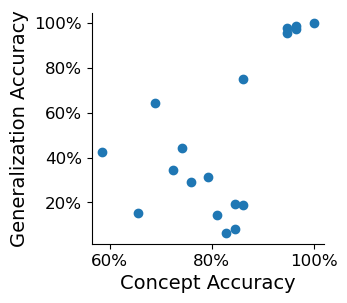

In [13]:
results = json.load(open('results/dsprites/dsprites_20_results_42.json'))
pca_dict = json.load(open('results/dsprites/pca_images.json','r'))
svm_accuracies = np.array(pca_dict['svm_accuracies'])


X = svm_accuracies
y = [1-results[i]['freq_with_concept_adversarial'][0]/results[i]['freq_with_concept_adversarial'][1] for i in concept_names]

plt.figure(figsize=(3,3))
plt.xlabel("Concept Accuracy",fontsize=14)
plt.ylabel("Generalization Accuracy",fontsize=14)
xtick_labels = ['60%', '80%','100%']
plt.xticks([0.6,0.8,1], xtick_labels,fontsize=12)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['0%','20%','40%','60%','80%','100%'],fontsize=12)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(x=X,y=y)
plt.savefig("results/figures/adversarial_scatter.pdf",dpi=300, bbox_inches='tight')
plt.show()

In [43]:
min(y)

0.0625

## CUB

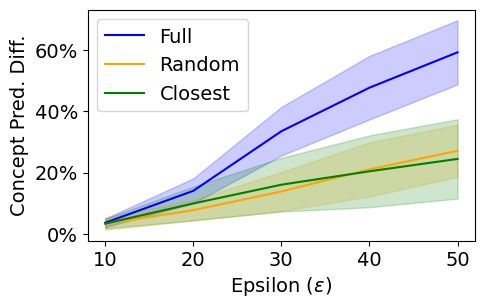

In [10]:
targeted_mask_list = [json.load(open("results/cub/mask_epsilon_{}.json".format(seed),"r")) for seed in [42,43,44]]
random_mask_list = [json.load(open("results/cub/mask_random_{}.json".format(seed),"r")) for seed in [42,43,44]]
closest_mask_list = [json.load(open("results/cub/mask_closest_{}.json".format(seed),"r")) for seed in [42,43,44]]

target_y = [[] for i in range(5)]
random_y = [[] for i in range(5)]
closest_y = [[] for i in range(5)]
for part in targeted_mask_list[0]['mean']:
    for i,epsilon in enumerate(targeted_mask_list[0]['mean'][part]):
        for seed_num in range(3):
            target_val = round(targeted_mask_list[seed_num]['mean'][part][epsilon],2)
            random_val = round(random_mask_list[seed_num]['mean'][part][epsilon],2)
            closest_val = round(closest_mask_list[seed_num]['mean'][part][epsilon],2)

            target_y[i].append(target_val)
            random_y[i].append(random_val) 
            closest_y[i].append(closest_val)

x_values = list(range(len(target_y)))

# Calculate means and standard deviations
target_mean = np.mean(target_y, axis=1)
random_mean = np.mean(random_y, axis=1)
closest_mean = np.mean(closest_y, axis=1)

target_std = np.std(target_y, axis=1)
random_std = np.std(random_y, axis=1)
closest_std = np.std(closest_y, axis=1)

# Create the plot
# sns.set(style="whitegrid")
plt.figure(figsize=(5,3))

plt.yticks([0,0.2,0.4,0.6,0.8],["0%","20%","40%","60%","80%"],fontsize=14)
plt.xticks([0,1,2,3,4],["10","20","30","40","50"],fontsize=14)
plt.xlabel("Epsilon ($\epsilon$)",fontsize=14)
plt.ylabel("Concept Pred. Diff.",fontsize=14)


# Line plots with standard deviations and custom labels
plt.plot(x_values, target_mean, label='Full', color='blue')
plt.fill_between(x_values, target_mean - target_std, target_mean + target_std, color='blue', alpha=0.2)

plt.plot(x_values, random_mean, label='Random', color='orange')
plt.fill_between(x_values, random_mean - random_std, random_mean + random_std, color='orange', alpha=0.2)

plt.plot(x_values, closest_mean, label='Closest', color='green')
plt.fill_between(x_values, closest_mean - closest_std, closest_mean + closest_std, color='green', alpha=0.2)
plt.legend(fontsize="14")
plt.savefig("results/figures/cub_epsilon.pdf",dpi=300, bbox_inches='tight')
plt.show()

# Other Plots

## Synthetic Dataset Exploration

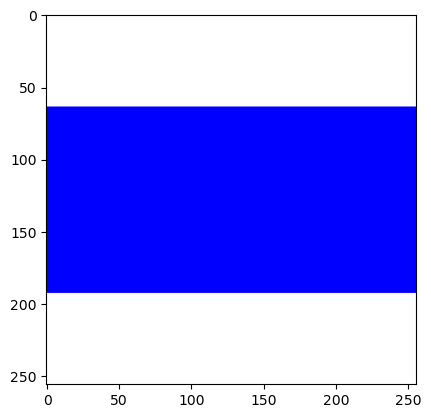

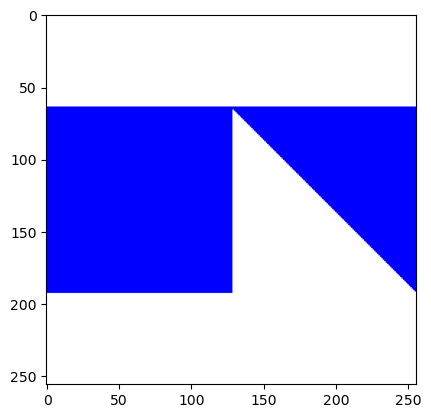

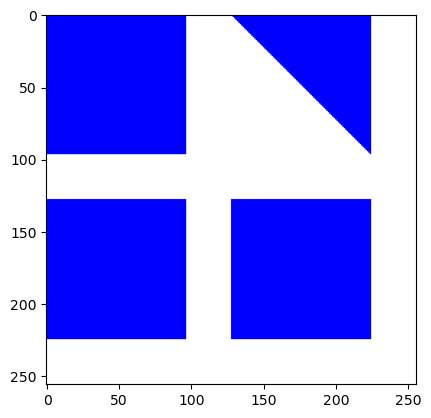

<Figure size 640x480 with 0 Axes>

In [ ]:
for num_objects in [1,2,4]:
    file_loc = "results/synthetic/objects={}_noisy=False_wd=0.0004_model=small3_optimizer=sgd_seed=42/1.png".format(
        num_objects)
    img = Image.open(file_loc)
    plt.imshow(img)
    plt.figure()

<Figure size 640x480 with 0 Axes>

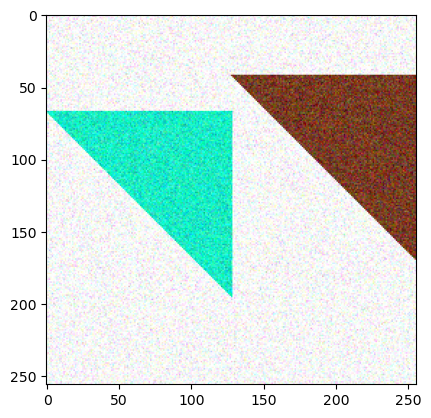

<Figure size 640x480 with 0 Axes>

In [ ]:
file_loc = "results/synthetic/objects=2_noisy=True_wd=0.0004_model=inceptionv3_optimizer=sgd_seed=42/1.png"
img = Image.open(file_loc)
plt.imshow(img)
plt.figure()

## Impact of Various Factors

### Impact of Model Size + Dataset Size

In [ ]:
for model_size in range(3,8):
    model_name = 'small{}'.format(model_size)
    file_loc = "results/synthetic/objects=1_noisy=False_wd=0.0004_model={}_optimizer=sgd_seed=42/results.json".format(
        model_name)
    results = json.loads(open(file_loc,"r").read())
    print(model_size,results['adversarial_activations'])

3 [1.0, 0.0007824904751032591]
4 [1.0, 6.305211718427017e-05]
5 [1.0, 1.0]
6 [1.0, 1.0]
7 [1.0, 1.0]


In [ ]:
for model_size in [3,5,7]:
    model_name = 'small{}'.format(model_size)
    file_loc = "results/synthetic/objects=2_noisy=False_wd=0.0004_model={}_optimizer=sgd_seed=42/results.json".format(
        model_name)
    results = json.loads(open(file_loc,"r").read())
    print(model_size,results['adversarial_activations'])

3 [1.0, 2.6289867686117704e-15, 1.0, 1.3749901714646818e-16]
5 [1.0, 1.0, 1.0, 1.0]
7 [1.0, 1.0, 1.0, 1.0]


In [ ]:
for model_size in [3,5,7]:
    model_name = 'small{}'.format(model_size)
    file_loc = "results/synthetic/objects=4_noisy=False_wd=0.0004_model={}_optimizer=sgd_seed=42/results.json".format(
        model_name)
    results = json.loads(open(file_loc,"r").read())
    print(model_size,results['adversarial_activations'])

3 [1.0, 0.009136064909398556, 1.0, 0.03512636199593544, 1.0, 4.0561721107224e-05, 1.0, 0.9999994039535522]
5 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
7 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


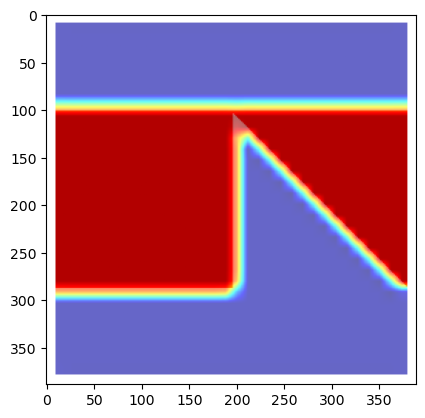

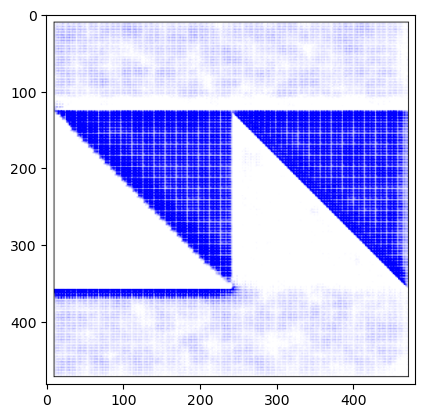

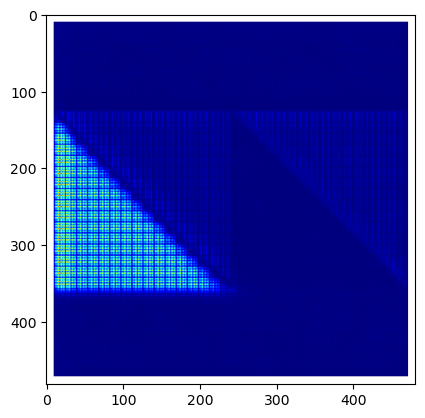

<Figure size 640x480 with 0 Axes>

In [ ]:
for method_name in ['gradcam','integrated_gradients','saliency']:
    img_loc = 'results/synthetic/objects=2_noisy=False_wd=0.0004_model=small3_optimizer=sgd_seed=42/{}.png'.format(method_name)
    img = mpimg.imread(img_loc)
    plt.imshow(img)
    plt.figure()

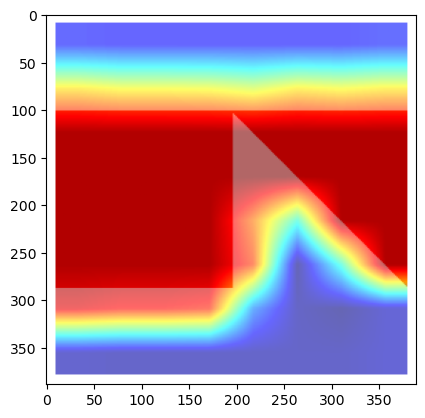

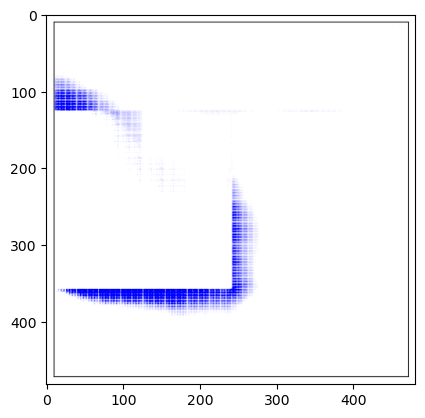

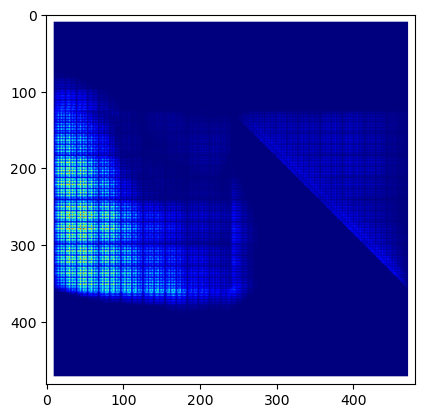

<Figure size 640x480 with 0 Axes>

In [ ]:
for method_name in ['gradcam','integrated_gradients','saliency']:
    img_loc = 'results/synthetic/objects=2_noisy=False_wd=0.0004_model=small5_optimizer=sgd_seed=42/{}.png'.format(method_name)
    img = mpimg.imread(img_loc)
    plt.imshow(img)
    plt.figure()

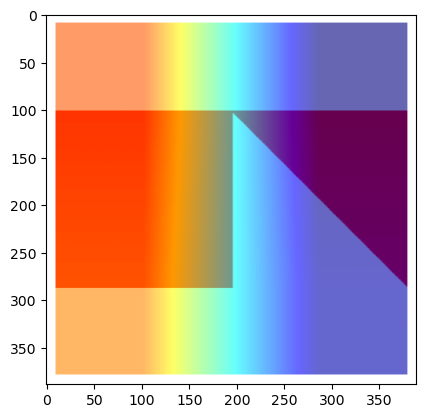

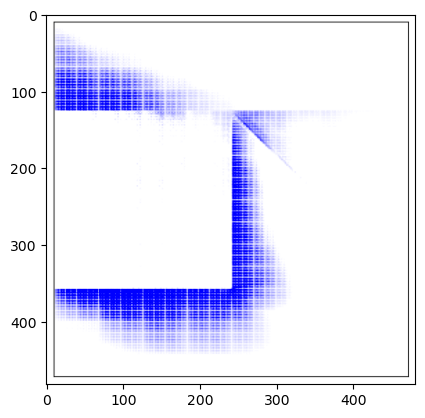

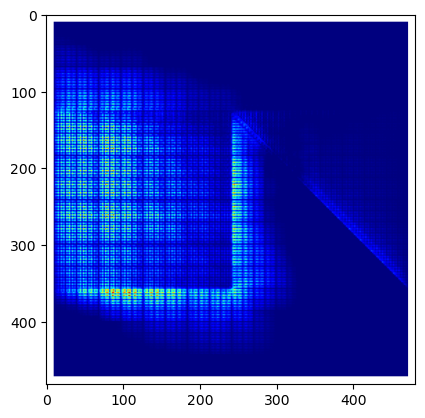

<Figure size 640x480 with 0 Axes>

In [ ]:
for method_name in ['gradcam','integrated_gradients','saliency']:
    img_loc = 'results/synthetic/objects=2_noisy=False_wd=0.0004_model=small7_optimizer=sgd_seed=42/{}.png'.format(method_name)
    img = mpimg.imread(img_loc)
    plt.imshow(img)
    plt.figure()

## MLP Models

In [ ]:
for model_size in [0,2,5,10,15,20,25]:
    model_name = "mlp_{}".format(model_size)
    results_loc = 'results/synthetic/objects=1_noisy=False_wd=0.0004_model={}_optimizer=sgd_seed=42/results.json'.format(model_name)
    results = json.load(open(results_loc,"r"))

    print("For model {}, activations {}, accuracy {}".format(model_name,results['adversarial_activations'],results['concept_accuracy']))

For model mlp_0, activations [1.0, 1.0], accuracy [1.0, 1.0]
For model mlp_2, activations [0.47962382435798645, 0.520338773727417], accuracy [0.51953125, 0.51953125]
For model mlp_5, activations [1.0, 0.4685688316822052], accuracy [1.0, 1.0]
For model mlp_10, activations [1.0, 0.5862383842468262], accuracy [1.0, 1.0]
For model mlp_15, activations [1.0, 1.0], accuracy [1.0, 1.0]
For model mlp_20, activations [1.0, 1.0], accuracy [1.0, 1.0]
For model mlp_25, activations [1.0, 0.704099714756012], accuracy [1.0, 1.0]


In [ ]:
results_loc = 'results/synthetic/objects=1_noisy=False_wd=0.0004_model=mlp_0_0_optimizer=sgd_seed=42/results.json'
results = json.load(open(results_loc,"r"))

print("For flat model, activations {}, accuracy {}".format(results['adversarial_activations'],results['concept_accuracy']))

For flat model, activations [1.0, 1.0], accuracy [1.0, 1.0]


In [ ]:
for model_size in [2,5,10,15,20,25]:
    model_name = "mlp_{}_1".format(model_size)
    results_loc = 'results/synthetic/objects=1_noisy=False_wd=0.0004_model={}_optimizer=sgd_seed=42/results.json'.format(model_name)
    results = json.load(open(results_loc,"r"))

    print("For model {}, activations {}, accuracy {}".format(model_name,results['adversarial_activations'],results['concept_accuracy']))

For model mlp_2_1, activations [0.47962382435798645, 0.520338773727417], accuracy [0.51953125, 0.51953125]
For model mlp_5_1, activations [1.0, 0.4685688316822052], accuracy [1.0, 1.0]
For model mlp_10_1, activations [1.0, 0.5862383842468262], accuracy [1.0, 1.0]
For model mlp_15_1, activations [1.0, 1.0], accuracy [1.0, 1.0]
For model mlp_20_1, activations [1.0, 1.0], accuracy [1.0, 1.0]
For model mlp_25_1, activations [1.0, 0.704099714756012], accuracy [1.0, 1.0]


In [ ]:
for model_size in [5,10,15]:
    model_name = "mlp_{}_2".format(model_size)
    results_loc = 'results/synthetic/objects=1_noisy=False_wd=0.0004_model={}_optimizer=sgd_seed=42/results.json'.format(model_name)
    results = json.load(open(results_loc,"r"))

    print("For model {}, activations {}, accuracy {}".format(model_name,results['adversarial_activations'],results['concept_accuracy']))

For model mlp_5_2, activations [1.0, 1.0], accuracy [1.0, 1.0]
For model mlp_10_2, activations [1.0, 1.0], accuracy [1.0, 1.0]
For model mlp_15_2, activations [1.0, 0.9983813762664795], accuracy [1.0, 1.0]


In [ ]:
for model_size in [5,10,15]:
    model_name = "mlp_{}_3".format(model_size)
    results_loc = 'results/synthetic/objects=1_noisy=False_wd=0.0004_model={}_optimizer=sgd_seed=42/results.json'.format(model_name)
    results = json.load(open(results_loc,"r"))

    print("For model {}, activations {}, accuracy {}".format(model_name,results['adversarial_activations'],results['concept_accuracy']))

For model mlp_5_3, activations [0.9532812237739563, 0.046061549335718155], accuracy [1.0, 1.0]
For model mlp_10_3, activations [0.963257372379303, 0.04110288619995117], accuracy [1.0, 1.0]
For model mlp_15_3, activations [1.0, 0.26883628964424133], accuracy [1.0, 1.0]


### Impact of Optimizer (SAM)

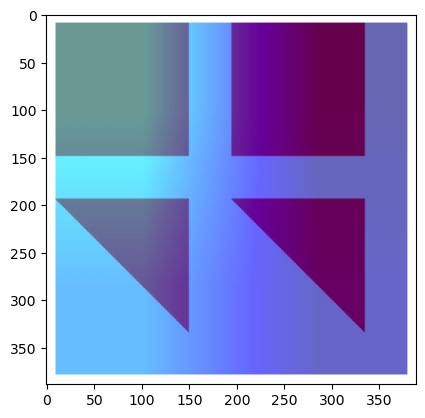

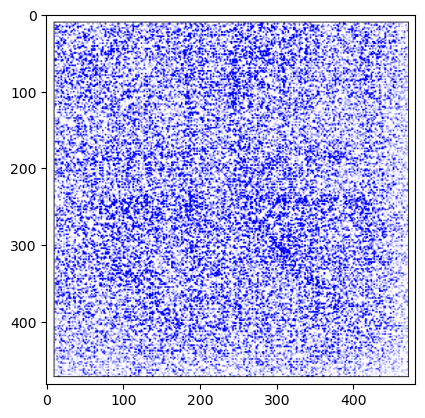

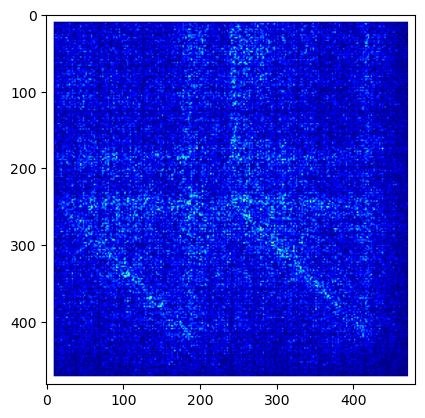

<Figure size 640x480 with 0 Axes>

In [ ]:
for method_name in ['gradcam','integrated_gradients','saliency']:
    img_loc = 'results/synthetic/objects=4_noisy=False_wd=0.0004_model=small7_optimizer=sam_seed=42/{}.png'.format(method_name)
    img = mpimg.imread(img_loc)
    plt.imshow(img)
    plt.figure()

In [ ]:
json_file = "results/synthetic/objects=4_noisy=False_wd=0.0004_model=small7_optimizer=sam_seed=42/results.json"
json_file = json.load(open(json_file))
json_file

{'train_accuracy': 0.681640625,
 'val_accuracy': 0.669921875,
 'concept_accuracy': [0.52734375,
  0.52734375,
  0.4921875,
  0.4921875,
  0.5146484375,
  0.4853515625,
  0.513671875,
  0.513671875],
 'adversarial_activations': [0.5572447180747986,
  0.5037020444869995,
  0.5046500563621521,
  0.5044770836830139,
  0.5041217803955078,
  0.5019526481628418,
  0.5019876956939697,
  0.504822313785553],
 'grid_dif': 6.300210952758789e-05}

### Impact of Noisy Dataset 

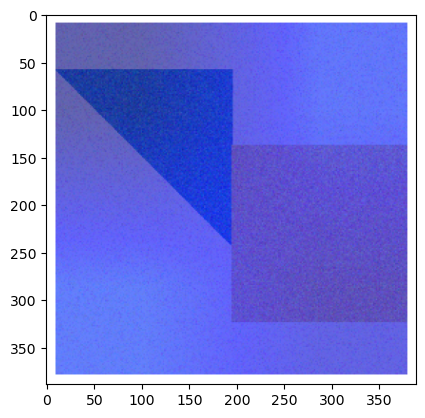

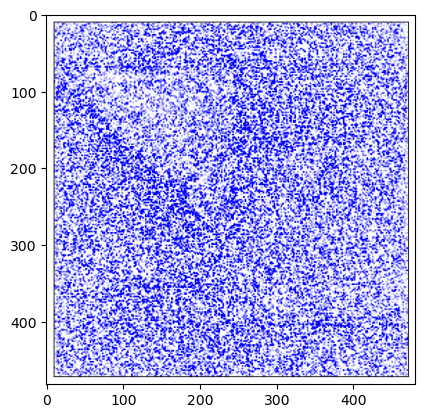

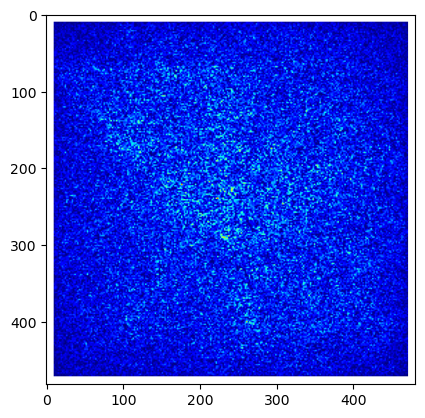

<Figure size 640x480 with 0 Axes>

In [ ]:
for method_name in ['gradcam','integrated_gradients','saliency']:
    img_loc = 'results/synthetic/objects=2_noisy=True_wd=0.0004_model=inceptionv3_optimizer=sgd_seed=42/{}.png'.format(method_name)
    img = mpimg.imread(img_loc)
    plt.imshow(img)
    plt.figure()

In [ ]:
json_file = "results/synthetic/objects=2_noisy=True_wd=0.0004_model=inceptionv3_optimizer=sgd_seed=42/results.json"
json_file = json.load(open(json_file))
json_file

{'train_accuracy': 0.69140625,
 'val_accuracy': 0.7734375,
 'concept_accuracy': [0.5390625, 0.4609375, 0.54296875, 0.45703125],
 'adversarial_activations': [0.541979968547821,
  0.5406992435455322,
  0.5390129685401917,
  0.5494141578674316],
 'grid_dif': 3.707408905029297e-05,
 'num_objects': 2,
 'noisy': True,
 'weight_decay': 0.0004,
 'encoder_model': 'inceptionv3',
 'optimizer': 'sgd',
 'seed': 42}

### Impact of SoftPlus

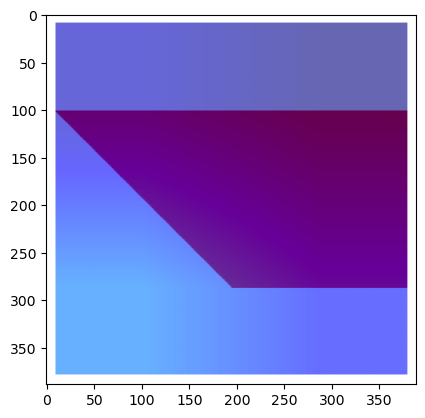

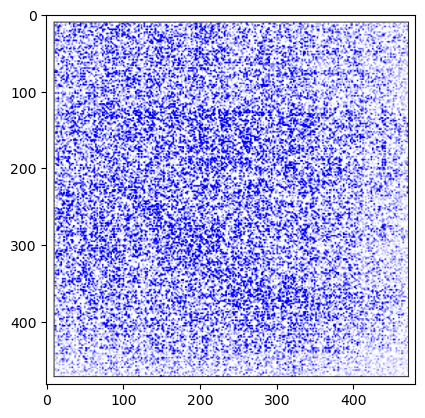

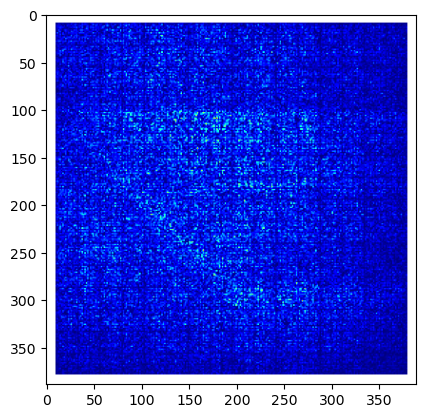

<Figure size 640x480 with 0 Axes>

In [ ]:
for method_name in ['gradcam','integrated_gradients','saliency']:
    img_loc = 'results/synthetic/objects=1_noisy=False_wd=0.0004_model=small7_softplus_optimizer=sgd_seed=42/{}.png'.format(method_name)
    img = mpimg.imread(img_loc)
    plt.imshow(img)
    plt.figure()

## Explanation Qualities

### Quantiative Analysis

In [ ]:
seed = 42

explanation_metrics = {}

for i in [1,2,4]:
    explanation_i = json.load(open("results/explanations/objects={}_seed=42/evaluation.json".format(i)))
    for key in explanation_i:
        for sub_key in explanation_i[key]:
            explanation_i[key][sub_key] = (np.mean(explanation_i[key][sub_key]),np.std(explanation_i[key][sub_key]))
    explanation_metrics[i] = explanation_i 

In [ ]:
for num_objects in explanation_metrics:
    print("=={}==".format(num_objects))
    for key in explanation_metrics[num_objects]['distances']:
        avg_value = explanation_metrics[num_objects]['distances'][key][0]
        avg_value = round(avg_value,2)
        print("Distance between small and large model explanations {}: {}".format(key,avg_value))

==1==
Distance between small and large model explanations saliency: 0.06
Distance between small and large model explanations gradcam: 0.32
Distance between small and large model explanations integrated gradients: 0.02
==2==
Distance between small and large model explanations saliency: 0.16
Distance between small and large model explanations gradcam: 0.34
Distance between small and large model explanations integrated gradients: 0.02
==4==
Distance between small and large model explanations saliency: 0.29
Distance between small and large model explanations gradcam: 0.24
Distance between small and large model explanations integrated gradients: 0.01


In [ ]:
for num_objects in explanation_metrics:
    print("=={}==".format(num_objects))
    for key in explanation_metrics[num_objects]['small_intensities']:
        avg_value = explanation_metrics[num_objects]['small_intensities'][key][0]
        avg_value = round(avg_value,2)
        print("Left-side localization in small models {}: {}".format(key,avg_value))

==1==
Left-side localization in small models saliency: 0.83
Left-side localization in small models gradcam: 0.51
Left-side localization in small models integrated gradients: 0.52
==2==
Left-side localization in small models saliency: 0.82
Left-side localization in small models gradcam: 0.5
Left-side localization in small models integrated gradients: 0.52
==4==
Left-side localization in small models saliency: 0.89
Left-side localization in small models gradcam: 0.48
Left-side localization in small models integrated gradients: 0.51


In [ ]:
for num_objects in explanation_metrics:
    print("=={}==".format(num_objects))
    for key in explanation_metrics[num_objects]['large_intensities']:
        avg_value = explanation_metrics[num_objects]['large_intensities'][key][0]
        avg_value = round(avg_value,2)
        print("Left-side localization in large models {}: {}".format(key,avg_value))

==1==
Left-side localization in large models saliency: 0.88
Left-side localization in large models gradcam: 0.42
Left-side localization in large models integrated gradients: 0.53
==2==
Left-side localization in large models saliency: 0.92
Left-side localization in large models gradcam: 0.44
Left-side localization in large models integrated gradients: 0.54
==4==
Left-side localization in large models saliency: 0.86
Left-side localization in large models gradcam: 0.53
Left-side localization in large models integrated gradients: 0.5


### Qualitative Results

In [ ]:
num_objects = 2

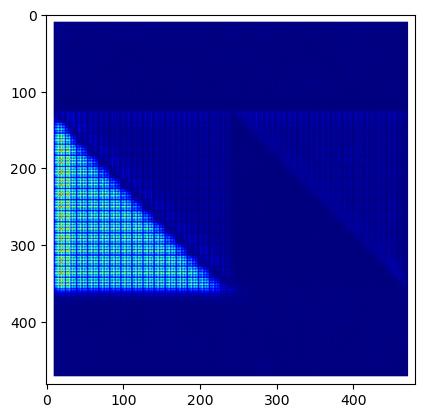

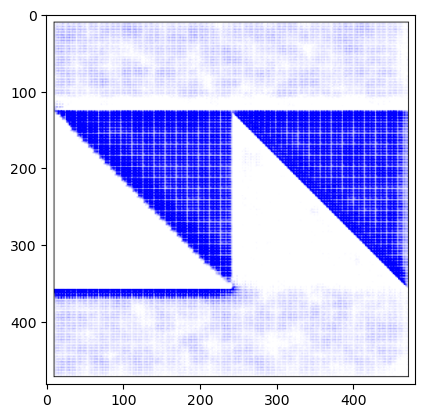

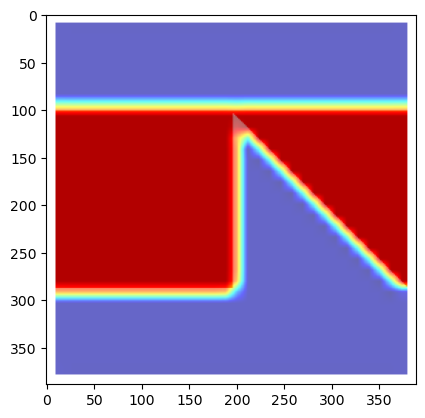

<Figure size 640x480 with 0 Axes>

In [ ]:
for method in ['saliency','integrated_gradients','gradcam']:
    file_loc = "results/synthetic/objects={}_noisy=False_wd=0.0004_model=small3_optimizer=sgd_seed=42/{}.png".format(
        num_objects,method)
    img = Image.open(file_loc)
    plt.imshow(img)
    plt.figure()


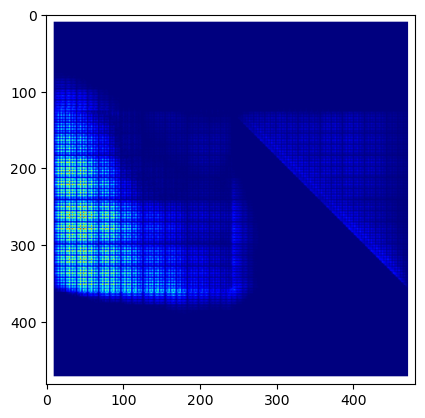

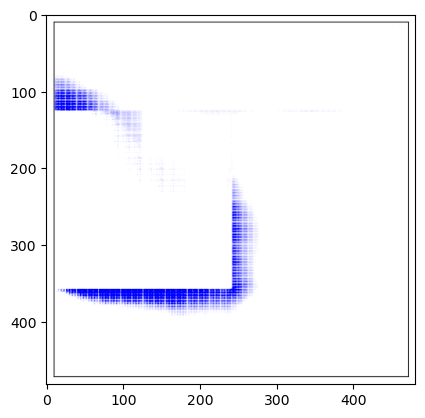

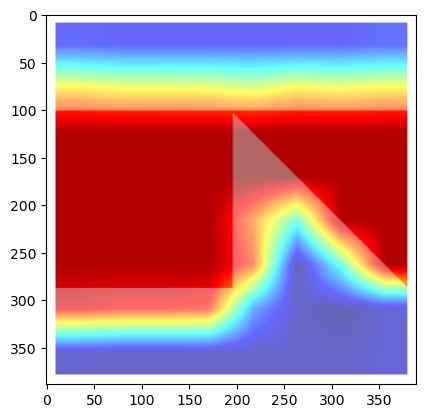

<Figure size 640x480 with 0 Axes>

In [ ]:
for method in ['saliency','integrated_gradients','gradcam']:
    file_loc = "results/synthetic/objects={}_noisy=False_wd=0.0004_model=small5_optimizer=sgd_seed=42/{}.png".format(
        num_objects,method)
    img = Image.open(file_loc)
    plt.imshow(img)
    plt.figure()


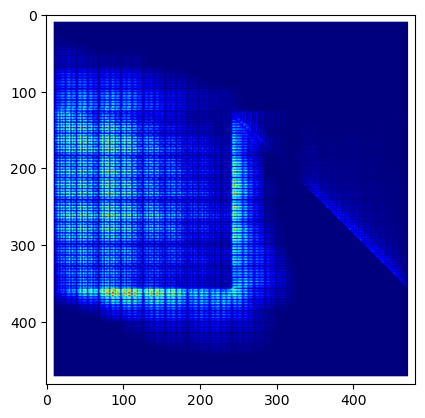

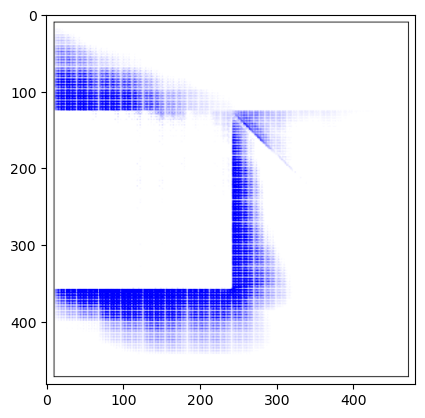

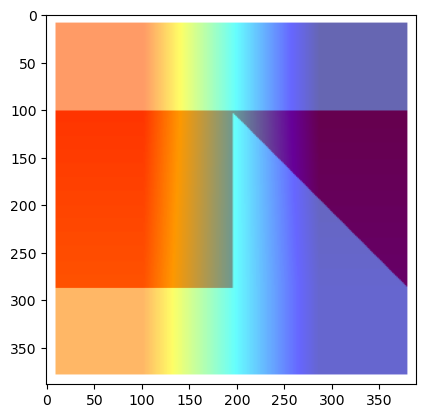

<Figure size 640x480 with 0 Axes>

In [ ]:
for method in ['saliency','integrated_gradients','gradcam']:
    file_loc = "results/synthetic/objects={}_noisy=False_wd=0.0004_model=small7_optimizer=sgd_seed=42/{}.png".format(
        num_objects,method)
    img = Image.open(file_loc)
    plt.imshow(img)
    plt.figure()


## CUB Masking

In [ ]:
sns.lineplot(target_y)
plt.xticks(list(range(len(target_y[0]))), list(targeted_mask[0]['mean'].keys()))

In [ ]:
dataset_name = "CUB"
data_dir = "../cem/cem/{}/preprocessed/".format(dataset_name)
train_data_path = os.path.join(data_dir, 'train.pkl')
train_pkl = pickle.load(open(train_data_path,"rb"))

In [ ]:
attribute_names = open("../cem/cem/CUB/metadata/attributes.txt").read().strip().split("\n")

In [ ]:
paired = []

for i in range(112):
    for j in range(i):
        for k in train_pkl:
            if k['attribute_label'][i] != k['attribute_label'][j]:
                break 
        else:
            paired.append((attribute_names[i],attribute_names[j]))
paired

[('294 has_crown_color::blue', '153 has_forehead_color::blue')]

## MLP Experiments

In [ ]:
mlp_results = json.load(open('results/synthetic/mlp_results.json','r'))

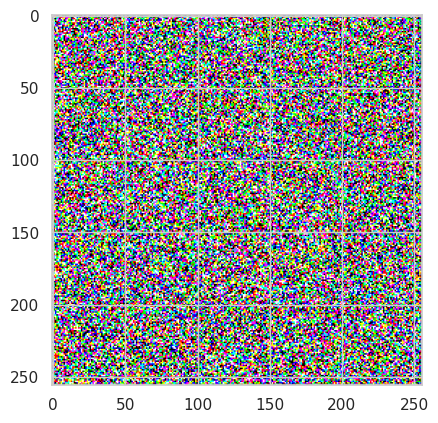

In [ ]:
img_loc = 'results/synthetic/mlp_adversarial_filter_1.png'
img = mpimg.imread(img_loc)
plt.imshow(img)

## Overall Adversarial Concept Exploration

In [7]:
accuracies = json.load(open('results/dsprites/dsprites_20_accuracy.json','r'))

In [8]:
predictions = json.load(open('results/dsprites/dsprites_20_predictions.json','r'))
all_predictions = predictions['our_predictions']
present_concept_combo = predictions['train_concepts']
correct_answers = predictions['ground_truths']
extra_predictions = predictions['predictions_raw']

In [18]:
results = json.load(open('results/dsprites/dsprites_20_results_42.json'))
results_5 = json.load(open('results/dsprites/dsprites_5_results_42.json'))
results_10 = json.load(open('results/dsprites/dsprites_10_results_42.json'))
results_15 = json.load(open('results/dsprites/dsprites_15_results_42.json'))

In [19]:
pca_dict = json.load(open('results/dsprites/pca_images.json','r'))
pca_images = np.array(pca_dict['pca_images'])
image_similarities = np.array(pca_dict['image_similarities'])
svm_accuracies = np.array(pca_dict['svm_accuracies'])

In [20]:
summary_stats = json.load(open('results/dsprites/summary_stats.json','r'))

## Individual Concept Exploration

In [21]:
concept_of_interest = 'is_heart'
concept_idx = concept_names.index(concept_of_interest)
argmin_with_concept = results[concept_of_interest]['argmin_with_concept']
argmax_with_concept = results[concept_of_interest]['argmax_with_concept']
combo_with_concept = [i for i in present_concept_combo if i[concept_idx] == '1']

In [22]:
list_to_index = {}
for i in range(len(correct_answers)):
    list_to_index[list_to_string(correct_answers[i])] = i

In [23]:
num_predicted_not_seen = len([i for i in all_predictions if i not in present_concept_combo])/len(all_predictions)

In [24]:
num_predicted_not_subset = []

for i in all_predictions:
    for j in present_concept_combo: 
        for k in range(len(i)):
            if i[k] == '1' and j[k] == '0':
                break 
        else:
            num_predicted_not_subset.append(i)
num_predicted_not_subset = len(num_predicted_not_subset)/len(all_predictions)
num_predicted_not_subset

0.6111111111111112

In [25]:
all_with_1 = []
for i in list_to_index:
    if i[concept_idx] == '1':
        distances = [hamming_distance(i,j) for j in combo_with_concept]
        idx = np.argmin(distances)
        min_dist = distances[idx] 
        flipped_concepts = hamming_distance(i,combo_with_concept[idx],diff_names=concept_names,ret_diff=True)
        idx = list_to_index[i] 
        pred = extra_predictions[idx][concept_idx]
        all_with_1.append({'dist': min_dist, 'name': i, 'prediction': pred, 'differences': flipped_concepts[1]})
predictions = [i['prediction'] for i in all_with_1]

In [26]:
list_flatten_1 = list(itertools.chain(*[i['differences'] for i in all_with_1 if i['prediction'] >= 0.75]))
list_flatten_0 = list(itertools.chain(*[i['differences'] for i in all_with_1 if i['prediction'] < 0.75]))

In [27]:
counter_1 = Counter(list_flatten_1)
counter_0 = Counter(list_flatten_0) 

for i in counter_1:
    counter_1[i] /= len(list_flatten_1)
    counter_1[i] = round(counter_1[i],2)

    if i not in counter_0:
        counter_0[i] = 0.0

for i in counter_0:
    counter_0[i] /= len(list_flatten_0)
    counter_0[i] = round(counter_0[i],2)

    if i not in counter_1:
        counter_1[i] = 0.0

counter_0 = dict(counter_0)
counter_1 = dict(counter_1)

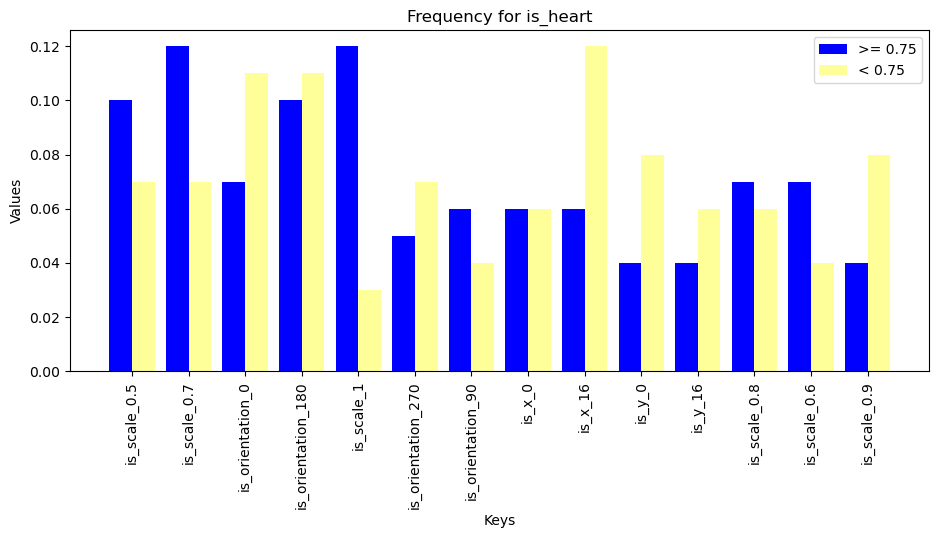

In [28]:
keys = list(counter_1.keys())
values_1 = list(counter_1.values())
values_0 = list(counter_0.values())

width = 0.4  # Width of the bars
x = np.arange(len(keys))  # Numeric locations for the bars

plt.bar(x - width/2, values_1, width, color='blue', label='>= 0.75')
plt.bar(x + width/2, values_0, width, color='#FFFF99', label='< 0.75')  # Light yellow

plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Frequency for {}'.format(concept_of_interest))
plt.xticks(x, keys, rotation='vertical')  # Rotate x-axis labels vertically
plt.legend()
plt.tight_layout()  # Adjust layout for better appearance
plt.gcf().set_size_inches(10, 6)  # Adjust the width of the graph
plt.show()

/rds/user/njr61/hpc-work/anaconda3/envs/cem/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


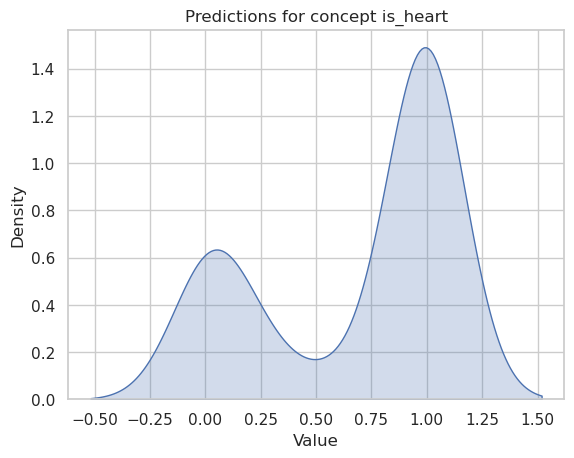

In [ ]:
sns.set(style="whitegrid")  # Set the style of the plot
sns.kdeplot(predictions, shade=True)  # Create the kernel density plot
plt.xlabel("Value")  # Label for x-axis
plt.ylabel("Density")  # Label for y-axis
plt.title("Predictions for concept {}".format(concept_of_interest))  # Title of the plot
plt.show()  # Show the plot

In [ ]:
sns.reset_orig()

## Patterns in Concept Adversarialness

In [ ]:
accuracy_by_distance = {}

for i in range(len(correct_answers)):
    distances = [hamming_distance(correct_answers[i],j) for j in present_concept_combo]
    min_distance = np.min(distances)

    if min_distance not in accuracy_by_distance:
        accuracy_by_distance[min_distance] = []

    accuracy_by_distance[min_distance].append(int(all_predictions[i] == correct_answers[i]))

for i in accuracy_by_distance:
    accuracy_by_distance[i] = (np.mean(accuracy_by_distance[i]),len(accuracy_by_distance[i]))

In [ ]:
concept_accuracy_by_distance = {}
for i in range(len(correct_answers)):
    for concept_name in concept_names:
        concept_idx = concept_names.index(concept_name)
        if concept_name not in concept_accuracy_by_distance:
            concept_accuracy_by_distance[concept_name] = {}

        distances = [hamming_distance(correct_answers[i],j) for j in present_concept_combo]
        min_distance = np.min(distances)

        if min_distance not in concept_accuracy_by_distance[concept_name]:
            concept_accuracy_by_distance[concept_name][min_distance] = []

        concept_accuracy_by_distance[concept_name][min_distance].append(int(all_predictions[i][concept_idx] == correct_answers[i][concept_idx]))

for i in concept_accuracy_by_distance:
    for j in concept_accuracy_by_distance[i]:
        concept_accuracy_by_distance[i][j] = (np.mean(concept_accuracy_by_distance[i][j]),len(concept_accuracy_by_distance[i][j]))


In [ ]:
frequency_train_concept_distance = {}
for i,pred in enumerate(all_predictions):
    distances = [hamming_distance(all_predictions[i],j) for j in present_concept_combo]
    min_distance = np.min(distances)

    if min_distance not in frequency_train_concept_distance:
        frequency_train_concept_distance[min_distance] = []

    frequency_train_concept_distance[min_distance].append(int(pred in present_concept_combo))

for i in frequency_train_concept_distance:
    frequency_train_concept_distance[i] = (np.mean(frequency_train_concept_distance[i]),len(frequency_train_concept_distance[i]))

In [ ]:
frequency_train_concept_distance

{0: (1.0, 81), 3: (0.0, 39), 2: (0.0, 79), 1: (0.0, 81), 4: (0.0, 8)}

In [15]:
concept_pairs = [(1,2),(2,3),(1,3)] # Manually encode the same shape

for i,name in enumerate(concept_names):
    for j,name_2 in enumerate(concept_names):
        if name.split("_")[1] == name_2.split("_")[1] and name > name_2:
            concept_pairs.append((i,j))

In [16]:
freq_double_pair = []
for i in all_predictions:
    has_pair = False

    for p_1,p_2 in concept_pairs:
        if i[p_1] == i[p_2] == '1':
            has_pair = True
            break
    
    freq_double_pair.append(int(has_pair))
freq_double_pair = np.mean(freq_double_pair)
freq_double_pair

0.4201388888888889

In [ ]:
double_pairs = []
for i in all_predictions:
    has_pair = False

    for p_1,p_2 in concept_pairs:
        if i[p_1] == i[p_2] == '1':
            double_pairs.append((concept_names[p_1],concept_names[p_2]))
double_pairs = Counter(double_pairs)

In [ ]:
concept_sets = [
    ["is_square",
    "is_ellipse",
    "is_heart"],[
    "is_scale_0.5",
    "is_scale_0.6",
    "is_scale_0.7",
    "is_scale_0.8",
    "is_scale_0.9",
    "is_scale_1",],[
    "is_orientation_0",
    "is_orientation_90",
    "is_orientation_180",
    "is_orientation_270",],
    ["is_x_0",
    "is_x_16",],[
    "is_y_0",
    "is_y_16",]
] 

In [11]:
freq_no_pair = []
for i in all_predictions:
    has_no_pair = False

    for s in concept_sets:
        for elem in s:
            if i[concept_names.index(elem)] == '1':
                break
        else:
            has_no_pair = True
    
    freq_no_pair.append(int(has_no_pair))
freq_no_pair = np.mean(freq_no_pair)
freq_no_pair

NameError: name 'concept_sets' is not defined

In [ ]:
freq_no_pair = []
for i in all_predictions:
    has_no_pair = False

    for s in concept_sets:
        for elem in s:
            if i[concept_names.index(elem)] == '1':
                break
        else:
            freq_no_pair.append(s[0])
Counter(freq_no_pair)

Counter({'is_orientation_0': 63,
         'is_scale_0.5': 45,
         'is_square': 18,
         'is_x_0': 1})

## Concept Difficulty

In [ ]:
closest_pair_same_concept = {}
furthest_pair_same_concept = {}
avg_dist_same_concept = {}

attributes_as_matrix = np.array([[int(j) for j in i] for i in correct_answers])

for i,concept in enumerate(concept_names):
    if i == 0:
        continue

    data_points_with_concept = np.where(attributes_as_matrix[:,i] == 1)[0]
    similarities_with_point = image_similarities[:,data_points_with_concept][data_points_with_concept]

    furthest_pair_same_concept[concept] = np.max(similarities_with_point).item()

    for j in range(len(similarities_with_point)):
        similarities_with_point[j][j] = 10000

    closest_pair_same_concept[concept] = np.min(similarities_with_point).item()
    avg_dist_same_concept[concept] = np.mean(similarities_with_point).item()
